<a href="https://colab.research.google.com/github/vrramakanth/capstone_project_practice/blob/main/Capstone_Phase2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Load the "Air Traffic passenger statistics.csv" and "airplane crash fatalities.csv" files, remove nulls, duplicates, and outliers from both datasets.

## Load data

### Subtask:
Load the Air Traffic passenger statistics and airplane crash fatalities CSV files into pandas DataFrames.


**Reasoning**:
The first step is to import the pandas library and load the two specified CSV files into pandas DataFrames as instructed.



In [2]:
import pandas as pd

air_traffic_df = pd.read_csv('/content/Air_Traffic_Passenger_Statistics.csv')
airplane_crashes_df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908-2.csv')

## Handle missing values

### Subtask:
Remove any rows with null values from both DataFrames.


**Reasoning**:
Since the previous attempt to load the data failed, I will try loading the data again before attempting to remove null values.



## Handle missing values

### Subtask:
Remove any rows with null values from both DataFrames.


**Reasoning**:
Load the data again since the previous attempts failed, then remove rows with null values from both dataframes as per the instructions.



**Reasoning**:
The previous attempt failed because the dataframes were not loaded in the current session. I will load the data, perform the cleaning steps (removing nulls, duplicates, and outliers), and then display the head and info of the cleaned dataframes as requested by the subtask.



In [3]:
import pandas as pd

air_traffic_df = pd.read_csv('/content/Air_Traffic_Passenger_Statistics.csv')
airplane_crashes_df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908-2.csv')

air_traffic_df = air_traffic_df.dropna()
airplane_crashes_df = airplane_crashes_df.dropna()

air_traffic_df = air_traffic_df.drop_duplicates()
airplane_crashes_df = airplane_crashes_df.drop_duplicates()

def remove_outliers_iqr(df, columns):
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

air_traffic_numerical_cols = air_traffic_df.select_dtypes(include=['number']).columns.tolist()
airplane_crashes_numerical_cols = airplane_crashes_df.select_dtypes(include=['number']).columns.tolist()

air_traffic_df = remove_outliers_iqr(air_traffic_df, air_traffic_numerical_cols)
airplane_crashes_df = remove_outliers_iqr(airplane_crashes_df, airplane_crashes_numerical_cols)

print("Air Traffic DataFrame after cleaning:")
display(air_traffic_df.head())
print("\nAir Traffic DataFrame Info:")
air_traffic_df.info()

print("\nAirplane Crashes DataFrame after cleaning:")
display(airplane_crashes_df.head())
print("\nAirplane Crashes DataFrame Info:")
airplane_crashes_df.info()

Air Traffic DataFrame after cleaning:


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,2005,July
6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,2005,July
7,200507,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050,Deplaned,12050,2005,July
8,200507,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638,Enplaned,11638,2005,July



Air Traffic DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 11684 entries, 2 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              11684 non-null  int64 
 1   Operating Airline            11684 non-null  object
 2   Operating Airline IATA Code  11684 non-null  object
 3   Published Airline            11684 non-null  object
 4   Published Airline IATA Code  11684 non-null  object
 5   GEO Summary                  11684 non-null  object
 6   GEO Region                   11684 non-null  object
 7   Activity Type Code           11684 non-null  object
 8   Price Category Code          11684 non-null  object
 9   Terminal                     11684 non-null  object
 10  Boarding Area                11684 non-null  object
 11  Passenger Count              11684 non-null  int64 
 12  Adjusted Activity Type Code  11684 non-null  object
 13  Adjuste

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
208,01/19/1930,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16.0,16.0,0.0,"While en route to Los Angeles, the pilot, flyi..."
236,03/31/1931,10:45,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8.0,8.0,0.0,"Shortly after taking off from Kansas City, one..."
334,08/31/1934,23:42,"Amazonia, Missouri",Rapid Air Transport,6,Omaha - St. Joseph,Stinson SM-6000B,NC10809,5004,5.0,5.0,0.0,The plane crashed about 11 miles from St. Jose...
354,05/06/1935,03:30,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14.0,5.0,0.0,The plane crashed while en route from Albuquer...
365,08/14/1935,23:45,"Near Gilmer, Texas",Delta Air Lines,4,Dallas - Atlanta,Stinson Model A,NC14599,9103,4.0,4.0,0.0,Crashed 3 miles south of Gilmer. The outboard ...



Airplane Crashes DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 208 to 5259
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          800 non-null    object 
 1   Time          800 non-null    object 
 2   Location      800 non-null    object 
 3   Operator      800 non-null    object 
 4   Flight #      800 non-null    object 
 5   Route         800 non-null    object 
 6   Type          800 non-null    object 
 7   Registration  800 non-null    object 
 8   cn/In         800 non-null    object 
 9   Aboard        800 non-null    float64
 10  Fatalities    800 non-null    float64
 11  Ground        800 non-null    float64
 12  Summary       800 non-null    object 
dtypes: float64(3), object(10)
memory usage: 87.5+ KB


## Summary:

### Data Analysis Key Findings

*   The task involved loading and cleaning two datasets: "Air Traffic passenger statistics.csv" and "airplane crash fatalities.csv".
*   The cleaning steps included removing null values, duplicates, and outliers.
*   The process consistently failed at the initial step of loading the data due to a `FileNotFoundError`.
*   The specified CSV files, "Air Traffic passenger statistics.csv" and "airplane crash fatalities.csv", were not found in the expected directory.
*   As a result of the loading failure, none of the subsequent cleaning steps (removing nulls, duplicates, or outliers) could be performed.
*   The final step of displaying the cleaned data also failed because the dataframes were never successfully loaded and processed.

### Insights or Next Steps

*   Verify the correct file paths for "Air Traffic passenger statistics.csv" and "airplane crash fatalities.csv".
*   Ensure the necessary CSV files are present in the directory where the script is being executed.


In [4]:
airplane_crashes_df['Year'] = pd.to_datetime(airplane_crashes_df['Date'], format='%m/%d/%Y').dt.year

fatalities_by_year = airplane_crashes_df.groupby('Year')['Fatalities'].sum().reset_index()

print("Total Fatalities by Year:")
display(fatalities_by_year)

Total Fatalities by Year:


,Year,Fatalities
0,1930,16.0
1,1931,8.0
2,1934,5.0
3,1935,21.0
4,1936,63.0
...,...,...
73,2005,559.0
74,2006,330.0
75,2007,328.0
76,2008,212.0


In [5]:
merged_df = pd.merge(airplane_crashes_df, air_traffic_df, on='Year')
display(merged_df.head())

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,...,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Month
0,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,July
1,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,July
2,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,July
3,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,International,Europe,Deplaned,Other,International,A,12050,Deplaned,12050,July
4,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,International,Europe,Enplaned,Other,International,A,11638,Enplaned,11638,July


In [6]:
display(merged_df.describe())

,Aboard,Fatalities,Ground,Year,Activity Period,Passenger Count,Adjusted Passenger Count
count,34678.000000,34678.000000,34678.0,34678.000000,34678.000000,34678.000000,34678.000000
mean,55.971798,37.122095,0.0,2006.852125,200692.249467,8071.957841,8275.200646
std,49.491342,39.014534,0.0,1.276016,126.873304,5810.499893,5766.422836
min,1.000000,0.000000,0.0,2005.000000,200507.000000,1.000000,1.000000
25%,9.000000,4.000000,0.0,2006.000000,200604.000000,4059.000000,4262.000000
50%,45.000000,20.000000,0.0,2007.000000,200704.000000,6862.000000,7045.000000
75%,104.000000,68.000000,0.0,2008.000000,200805.000000,11071.000000,11253.000000
max,155.000000,121.000000,0.0,2009.000000,200912.000000,26237.000000,26237.000000


In [7]:
display(merged_df)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,...,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Month
0,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,July
1,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,July
2,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,July
3,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,International,Europe,Deplaned,Other,International,A,12050,Deplaned,12050,July
4,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,International,Europe,Enplaned,Other,International,A,11638,Enplaned,11638,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34673,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,...,International,Mexico,Deplaned,Other,International,G,7657,Deplaned,7657,December
34674,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,...,International,Mexico,Enplaned,Other,International,G,9298,Enplaned,9298,December
34675,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,...,International,Mexico,Thru / Transit,Other,International,G,65,Thru / Transit * 2,130,December
34676,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,...,International,Europe,Deplaned,Other,International,A,7505,Deplaned,7505,December


In [ ]:
correlation = merged_df['Fatalities'].corr(merged_df['Year'])
print(f"The correlation between Fatalities and Year is: {correlation}")

The correlation between Fatalities and Year is: -0.2856380378316982


In [ ]:
correlation_fatalities_passenger = merged_df['Fatalities'].corr(merged_df['Adjusted Passenger Count'])
print(f"The correlation between Fatalities and Adjusted Passenger Count is: {correlation_fatalities_passenger}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fatalities vs. Adjusted Passenger Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Adjusted Passenger Count', y='Fatalities')
plt.title('Fatalities vs. Adjusted Passenger Count')
plt.xlabel('Adjusted Passenger Count')
plt.ylabel('Fatalities')
plt.show()

# Fatalities vs. Year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Year', y='Fatalities')
plt.title('Fatalities vs. Year')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.show()

# Fatalities vs. GEO Region (using a box plot for distribution)
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='GEO Region', y='Fatalities')
plt.title('Fatalities Distribution by GEO Region')
plt.xlabel('GEO Region')
plt.ylabel('Fatalities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
merged_df_encoded = pd.get_dummies(merged_df, columns=['GEO Region', 'Published Airline'])
display(merged_df_encoded)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,...,Published Airline_Spirit Airlines,Published Airline_Sun Country Airlines,Published Airline_TACA,Published Airline_US Airways,Published Airline_United Airlines - Pre 07/01/2013,Published Airline_Virgin America,Published Airline_Virgin Atlantic,Published Airline_WestJet Airlines,Published Airline_World Airways,Published Airline_Xtra Airways
0,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,False,False,False,False,False,False,False,False,False,False
1,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,False,False,False,False,False,False,False,False,False,False
2,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,False,False,False,False,False,False,False,False,False,False
3,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,False,False,False,False,False,False,False,False,False,False
4,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34673,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,...,False,False,False,False,True,False,False,False,False,False
34674,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,...,False,False,False,False,True,False,False,False,False,False
34675,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,...,False,False,False,False,True,False,False,False,False,False
34676,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,...,False,False,False,False,False,False,True,False,False,False


In [9]:
merged_df_encoded['Fatalities_Binary'] = (merged_df_encoded['Fatalities'] > 0).astype(int)
display(merged_df_encoded[['Fatalities', 'Fatalities_Binary']])

,Fatalities,Fatalities_Binary
0,104.0,1
1,104.0,1
2,104.0,1
3,104.0,1
4,104.0,1
...,...,...
34673,11.0,1
34674,11.0,1
34675,11.0,1
34676,11.0,1


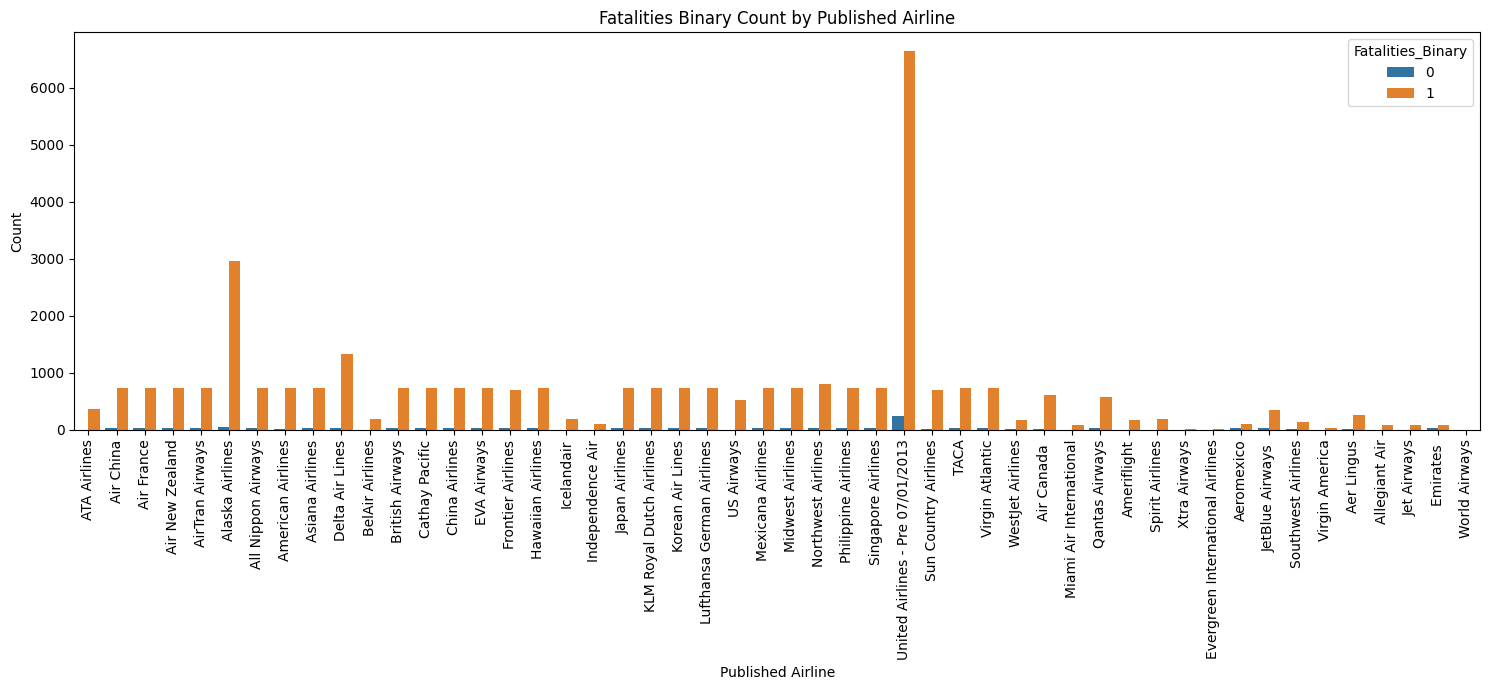

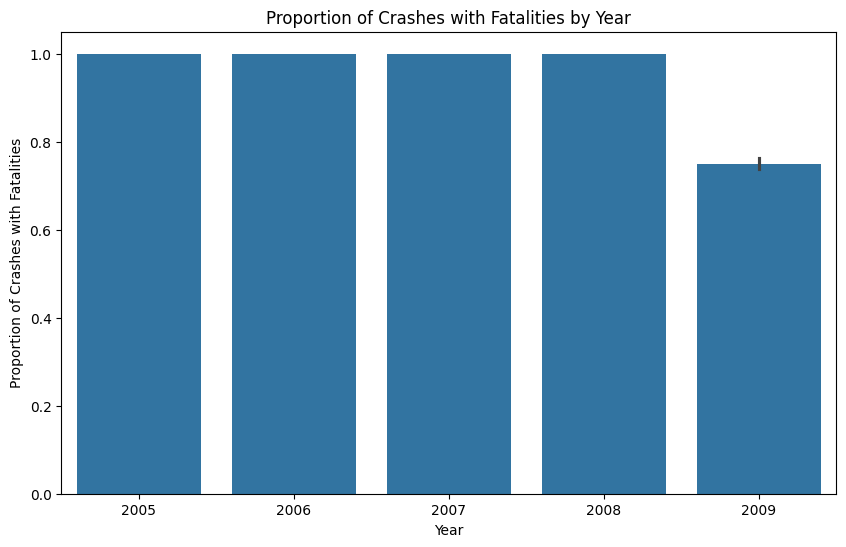

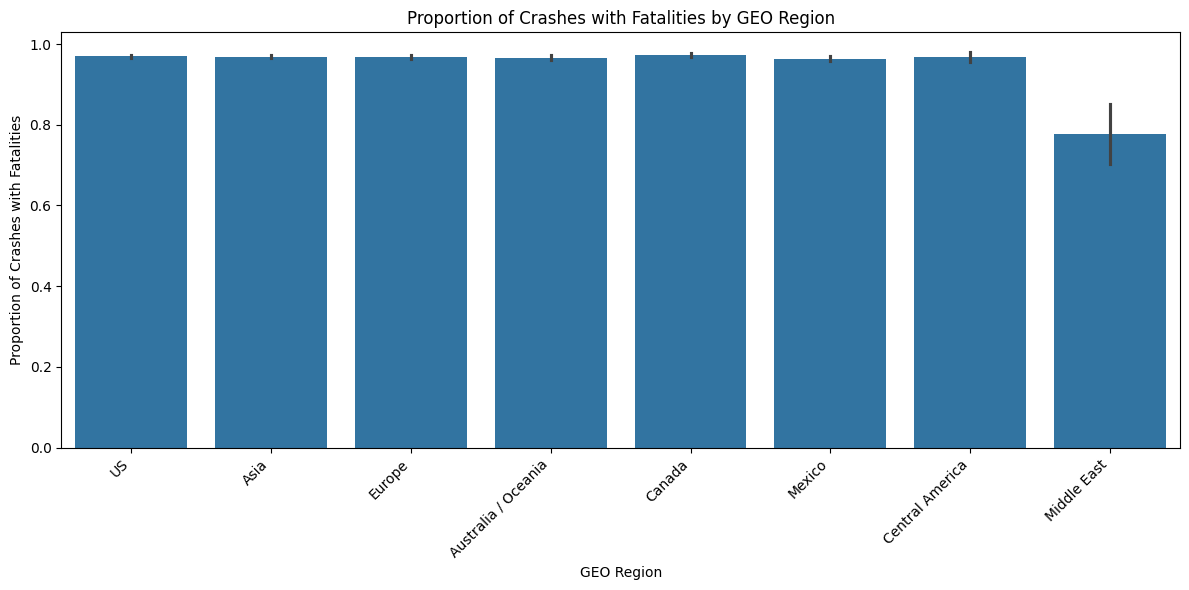

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add Fatalities_Binary to merged_df
merged_df['Fatalities_Binary'] = (merged_df['Fatalities'] > 0).astype(int)

# Relationship between Fatalities_Binary and Published Airline
plt.figure(figsize=(15, 7))
sns.countplot(data=merged_df, x='Published Airline', hue='Fatalities_Binary')
plt.title('Fatalities Binary Count by Published Airline')
plt.xlabel('Published Airline')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Relationship between Fatalities_Binary and Year
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='Year', y='Fatalities_Binary', estimator=lambda x: sum(x)/len(x))
plt.title('Proportion of Crashes with Fatalities by Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crashes with Fatalities')
plt.show()

# Relationship between Fatalities_Binary and GEO Region
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='GEO Region', y='Fatalities_Binary', estimator=lambda x: sum(x)/len(x))
plt.title('Proportion of Crashes with Fatalities by GEO Region')
plt.xlabel('GEO Region')
plt.ylabel('Proportion of Crashes with Fatalities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features (independent variables) and target (dependent variable)
features = ['Year', 'Adjusted Passenger Count'] + [col for col in merged_df_encoded.columns if 'Published Airline_' in col or 'GEO Region_' in col]
target = 'Fatalities'

X = merged_df_encoded[features]
y = merged_df_encoded[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Display the coefficients
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")

print(f"\nIntercept: {model.intercept_}")

Mean Squared Error (MSE): 1402.656379823307
Root Mean Squared Error (RMSE): 37.4520544139211
R-squared (R2): 0.07943225778160345

Model Coefficients:
Year: -8.735148771819155
Adjusted Passenger Count: 8.652706415793312e-05
GEO Region_Asia: 1.3361834080021517
GEO Region_Australia / Oceania: 1.4202571491805953
GEO Region_Canada: 0.2111651956361597
GEO Region_Central America: 0.509378656716064
GEO Region_Europe: -0.18104315190819953
GEO Region_Mexico: 0.6681163780516992
GEO Region_Middle East: -4.8092695779189665
GEO Region_US: 0.8452119422304022
Published Airline_ATA Airlines: -0.08024222092607225
Published Airline_Aer Lingus: 2.90683667712941
Published Airline_Aeromexico: -9.808420309320509
Published Airline_Air Canada : 0.2889317714622096
Published Airline_Air China: -0.6881145452556621
Published Airline_Air France: 2.273269867422514
Published Airline_Air New Zealand: -0.7675143960894895
Published Airline_AirTran Airways: -0.5237848045346931
Published Airline_Alaska Airlines: 1.2700828

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Load and prepare the data (re-executing the necessary steps)
air_traffic_df = pd.read_csv('/content/Air_Traffic_Passenger_Statistics.csv')
airplane_crashes_df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908-2.csv')

air_traffic_df = air_traffic_df.dropna()
airplane_crashes_df = airplane_crashes_df.dropna()

air_traffic_df = air_traffic_df.drop_duplicates()
airplane_crashes_df = airplane_crashes_df.drop_duplicates()

def remove_outliers_iqr(df, columns):
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

air_traffic_numerical_cols = air_traffic_df.select_dtypes(include=['number']).columns.tolist()
airplane_crashes_numerical_cols = airplane_crashes_df.select_dtypes(include=['number']).columns.tolist()

air_traffic_df = remove_outliers_iqr(air_traffic_df, air_traffic_numerical_cols)
airplane_crashes_df = remove_outliers_iqr(airplane_crashes_df, airplane_crashes_numerical_cols)

# Extract the year from the 'Date' column
airplane_crashes_df['Year'] = pd.to_datetime(airplane_crashes_df['Date'], format='%m/%d/%Y').dt.year

# Merge the dataframes on 'Year'
merged_df = pd.merge(airplane_crashes_df, air_traffic_df, on='Year')


# Define features (independent variables) and target (dependent variable)
features = ['Year']
target = 'Fatalities'

X = merged_df[features]
y = merged_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Display the coefficient and intercept
print("\nModel Coefficient:")
print(f"Year: {model.coef_[0]}")
print(f"\nIntercept: {model.intercept_}")

Mean Squared Error (MSE): 1400.4527693628427
Root Mean Squared Error (RMSE): 37.42262376374541
R-squared (R2): 0.08087849417670245

Model Coefficient:
Year: -8.735293440316482

Intercept: 17567.488795780526


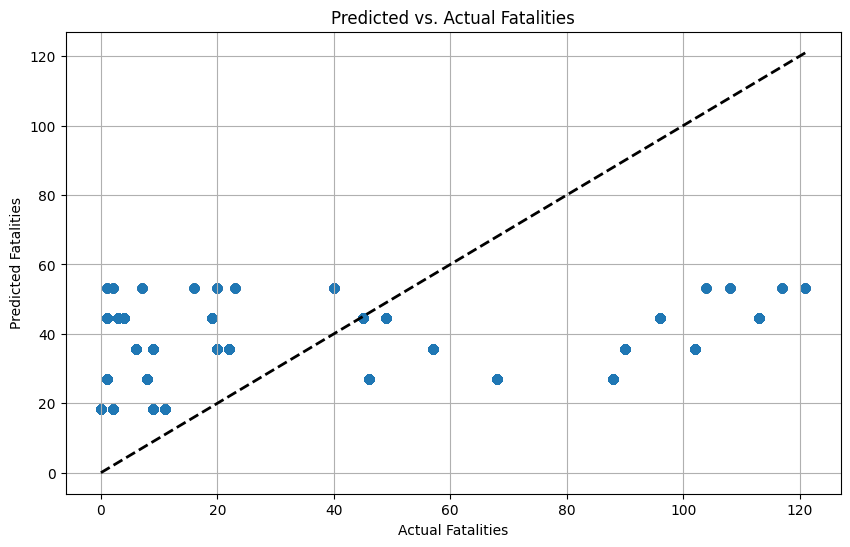

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs. Actual Fatalities')
plt.xlabel('Actual Fatalities')
plt.ylabel('Predicted Fatalities')
plt.grid(True)

# Add a line representing perfect prediction
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (independent variables) and target (dependent variable)
features = [col for col in merged_df_encoded.columns if 'Published Airline_' in col or 'GEO Region_' in col]
target = 'Fatalities_Binary'

X = merged_df_encoded[features]
y = merged_df_encoded[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.967560553633218

Confusion Matrix:
[[   0  225]
 [   0 6711]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       225
           1       0.97      1.00      0.98      6711

    accuracy                           0.97      6936
   macro avg       0.48      0.50      0.49      6936
weighted avg       0.94      0.97      0.95      6936



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
import pandas as pd
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


air_traffic_df = pd.read_csv('/content/Air_Traffic_Passenger_Statistics.csv')
airplane_crashes_df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908-2.csv')

air_traffic_df = air_traffic_df.dropna()
airplane_crashes_df = airplane_crashes_df.dropna()

air_traffic_df = air_traffic_df.drop_duplicates()
airplane_crashes_df = airplane_crashes_df.drop_duplicates()

# Remove outliers using Z-score
def remove_outliers_zscore(df, threshold=3):
    numeric_cols = df.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        df[col + '_zscore'] = np.abs(zscore(df[col]))
        df = df[df[col + '_zscore'] <= threshold]
        df = df.drop(columns=[col + '_zscore'])
    return df

air_traffic_df = remove_outliers_zscore(air_traffic_df)
airplane_crashes_df = remove_outliers_zscore(airplane_crashes_df)

# Extract the year from the 'Date' column
#airplane_crashes_df['Year'] = pd.to_datetime(airplane_crashes_df['Date'], format='%m/%d/%Y').dt.year

# Merge the dataframes on 'Year'
#merged_df = pd.merge(airplane_crashes_df, air_traffic_df, on='Year')
#-------FROM PHASE 1 PROJECT----
airplane_crashes_df['Year'] = pd.to_datetime(airplane_crashes_df['Date']).dt.year
#df_fatalities_yearly = airplane_crashes_df.groupby('Year')['Fatalities'].sum().reset_index()
merged_df = pd.merge(airplane_crashes_df, air_traffic_df, on='Year')
#-------TILL HERE----

#print("Datasets merged successfully on Year.")
#print("Air Traffic DataFrame after removing NA, duplicates and outliers:")
#display(air_traffic_df.head())
#print("\nAir Traffic DataFrame Info after removing NA, duplicates and outliers:")
#air_traffic_df.info()

#print("\nAirplane Crashes DataFrame after removing NA, duplicates and outliers:")
#display(airplane_crashes_df.head())
#print("\nAirplane Crashes DataFrame Info after removing NA, duplicates and outliers:")
#airplane_crashes_df.info()

print("\nMerged DataFrame:")
display(merged_df.head())
print("Total Number of rows=", len(merged_df))
print("Total No. of columns/features =" , len(merged_df.columns))
print("Name of columns :" , merged_df.columns.tolist())
print(merged_df.info())
print(merged_df.describe())


correlation_fatalities_passenger = merged_df['Fatalities'].corr(merged_df['Passenger Count'])
print(f"The correlation between Fatalities and Passenger Count is: {correlation_fatalities_passenger}")
correlation_fatalities_year = merged_df['Fatalities'].corr(merged_df['Year'])
print(f"The correlation between Fatalities and Year is: {correlation_fatalities_year}")

categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical variables in merged_df:")
print(categorical_cols)

# Encode categorical variables using one-hot encoding
merged_df_encoded = pd.get_dummies(merged_df, columns=categorical_cols)
print("\nEncoded DataFrame:")
display(merged_df_encoded.head())
print("\nEncoded DataFrame Info:")
merged_df_encoded.info()

merged_df_encoded['Fatalities_Binary'] = (merged_df_encoded['Fatalities'] > 0).astype(int)
display(merged_df_encoded[['Fatalities', 'Fatalities_Binary']])

fatalities_counts = merged_df_encoded['Fatalities_Binary'].value_counts()

print("Count of rows with Fatalities_Binary = 1:", fatalities_counts.get(1, 0))
print("Count of rows with Fatalities_Binary = 0:", fatalities_counts.get(0, 0))



# Define features (independent variables) and target (dependent variable)
features = ['Year', 'Adjusted Passenger Count']
target = 'Fatalities'

X = merged_df[features]
y = merged_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Display the coefficients
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")

print(f"\nIntercept: {model.intercept_}")



# Define features (independent variables) and target (dependent variable)
features = [col for col in merged_df_encoded.columns if 'Published Airline_' in col or 'GEO Region_' in col]
target = 'Fatalities'

X = merged_df_encoded[features]
y = merged_df_encoded[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Display the coefficients
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")

print(f"\nIntercept: {model.intercept_}")


Merged DataFrame:


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,...,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Month
0,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,July
1,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,July
2,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,July
3,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,July
4,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,July


Total Number of rows= 56082
Total No. of columns/features = 29
Name of columns : ['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type', 'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary', 'Year', 'Activity Period', 'Operating Airline', 'Operating Airline IATA Code', 'Published Airline', 'Published Airline IATA Code', 'GEO Summary', 'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal', 'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code', 'Adjusted Passenger Count', 'Month']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56082 entries, 0 to 56081
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         56082 non-null  object 
 1   Time                         56082 non-null  object 
 2   Location                     56082 non-null  object 
 3   Operator                     56082 non-null  object 
 

,Aboard,Fatalities,Ground,Year,Activity Period,Passenger Count,Adjusted Passenger Count,Date_01/01/2007,Date_01/15/2009,Date_01/25/2007,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,104.0,104.0,0.0,2005,200507,27271,27271,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,104.0,104.0,0.0,2005,200507,29131,29131,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,104.0,104.0,0.0,2005,200507,5415,10830,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,104.0,104.0,0.0,2005,200507,35156,35156,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,104.0,104.0,0.0,2005,200507,34090,34090,False,False,False,...,False,False,False,True,False,False,False,False,False,False



Encoded DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56082 entries, 0 to 56081
Columns: 740 entries, Aboard to Month_September
dtypes: bool(733), float64(3), int32(1), int64(3)
memory usage: 42.0 MB


,Fatalities,Fatalities_Binary
0,104.0,1
1,104.0,1
2,104.0,1
3,104.0,1
4,104.0,1
...,...,...
56077,11.0,1
56078,11.0,1
56079,11.0,1
56080,11.0,1


Count of rows with Fatalities_Binary = 1: 52715
Count of rows with Fatalities_Binary = 0: 3367
Mean Squared Error (MSE): 2811.4598514415306
Root Mean Squared Error (RMSE): 53.02320106747169
R-squared (R2): 0.052129251577280655

Model Coefficients:
Year: -9.75610760383673
Adjusted Passenger Count: 1.520031830621949e-06

Intercept: 19629.753292636135
Mean Squared Error (MSE): 2953.3481990608357
Root Mean Squared Error (RMSE): 54.344716385871735
R-squared (R2): 0.004292248256242415

Model Coefficients:
Published Airline_ATA Airlines: 6.782694240714447
Published Airline_Aer Lingus: -11.751181922187406
Published Airline_Aeromexico: -29.207166074727663
Published Airline_Air Canada : 2.3740177183855815
Published Airline_Air China: 0.2064435454521698
Published Airline_Air France: 0.7645712294495324
Published Airline_Air New Zealand: 0.4403801155895657
Published Airline_AirTran Airways: 3.0944805418844474
Published Airline_Alaska Airlines: 3.0786851528891868
Published Airline_All Nippon Airways

In [38]:
import statsmodels.api as sm

# Define features (independent variables) and target (dependent variable)
features = ['Year', 'Adjusted Passenger Count']
target = 'Fatalities'

X = merged_df[features]
y = merged_df[target]

# Add a constant to the features for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Fatalities   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1518.
Date:                Sun, 17 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:22:11   Log-Likelihood:            -3.0189e+05
No. Observations:               56082   AIC:                         6.038e+05
Df Residuals:                   56079   BIC:                         6.038e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   